In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

#plt.jet()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data = np.load("../Data/m1testcell/print-through/outer.pkl",allow_pickle=True)
nodex = np.asarray(data["nodes"]).reshape(-1,2)[:,0]
nodey = np.asarray(data["nodes"]).reshape(-1,2)[:,1]
s = np.asarray(data["field"])

In [59]:
np.asarray(data["nodes"]).reshape(-1,2).T.shape, np.asarray(data["field"]).shape

((2, 27685), (27685,))

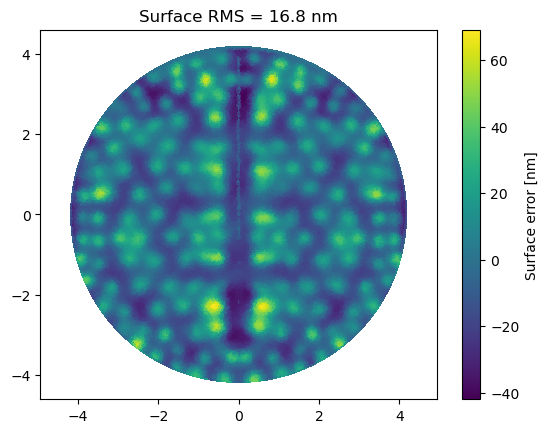

In [3]:
plt.tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
plt.colorbar(label="Surface error [nm]")
plt.title('Surface RMS = %.1f nm'%(np.std(s)*1e9))
plt.axis('equal');

(-4.599063954, 4.599069034, -4.599119326, 4.599114246)

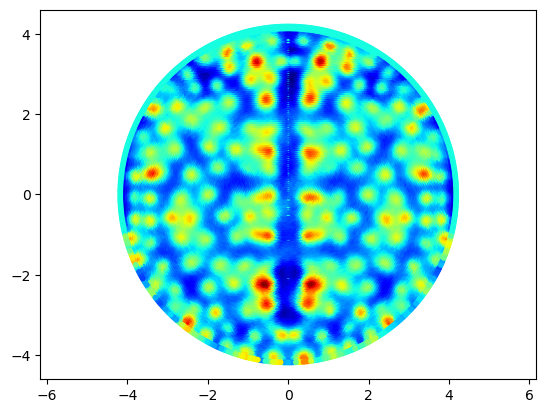

In [48]:
plt.scatter(nodex, nodey, 10, c=s)
plt.axis('equal')

## the zoom-ins below explain why the triangulation plot look different from the scatter

(2.0, 4.0)

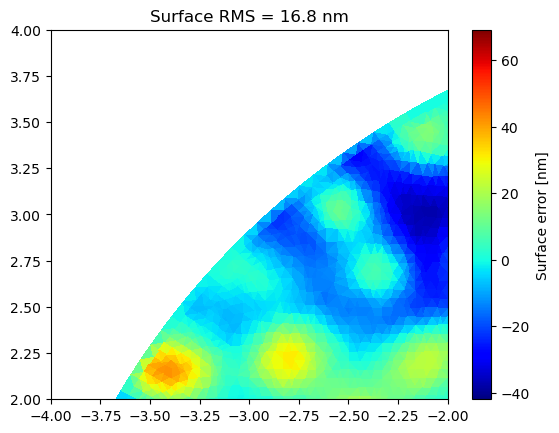

In [42]:
plt.tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
plt.colorbar(label="Surface error [nm]")
plt.title('Surface RMS = %.1f nm'%(np.std(s)*1e9))
plt.xlim([-4,-2])
plt.ylim([2, 4])
#plt.axis('equal');

(2.0, 4.0)

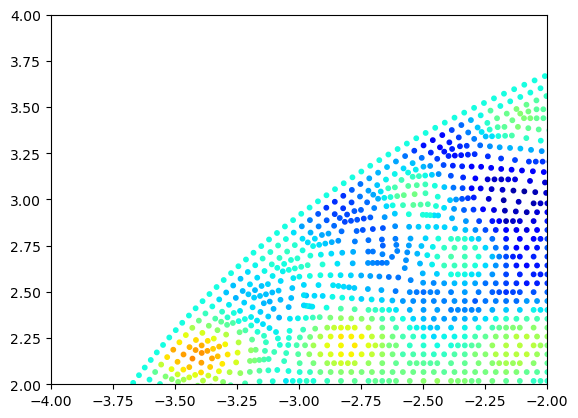

In [41]:
plt.scatter(nodex, nodey, 10, c=s)
plt.xlim([-4,-2])
plt.ylim([2, 4])
#plt.axis('equal')

## nozzle influence functions

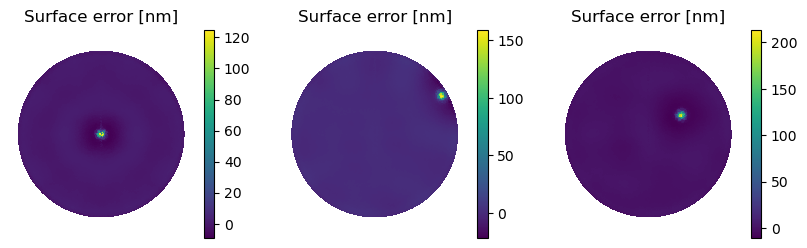

In [8]:
fig, ax = plt.subplots(1,3, figsize=(10,2.7))

data = np.load("../Data/m1testcell/nozzles/center/outer.pkl",allow_pickle=True)
img = ax[0].tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
fig.colorbar(img, ax=ax[0])
ax[0].set_title('Surface error [nm]')
ax[0].axis('equal');
ax[0].axis('off');

data = np.load("../Data/m1testcell/nozzles/edge/outer.pkl",allow_pickle=True)
img = ax[1].tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Surface error [nm]')
ax[1].axis('equal');
ax[1].axis('off');

data = np.load("../Data/m1testcell/nozzles/mid/outer.pkl",allow_pickle=True)
img = ax[2].tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
fig.colorbar(img, ax=ax[2])
ax[2].set_title('Surface error [nm]')
ax[2].axis('equal');
ax[2].axis('off');

(-0.3, 0.3)

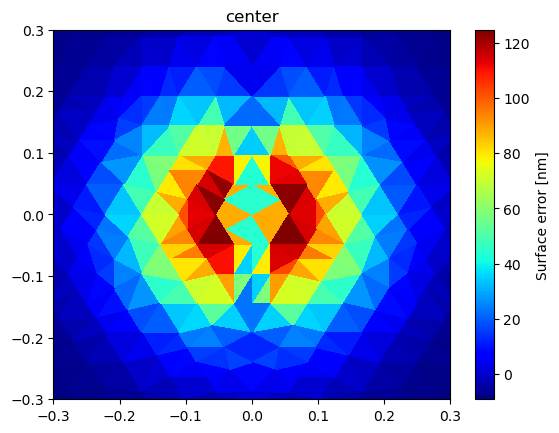

In [44]:
data = np.load("../Data/m1testcell/nozzles/center/outer.pkl",allow_pickle=True)
plt.tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
plt.colorbar(label="Surface error [nm]")
plt.title('center')
plt.xlim([-.3,.3])
plt.ylim([-.3, .3])
#plt.axis('equal');

## Disabled actuators

In [7]:
mat1 = scipy.io.loadmat('../Data/m1testcell/cold-spot_single/tcell_nosa_dTn.mat')
mat2 = scipy.io.loadmat('../Data/m1testcell/cold-spot_triple/tcell_nota_dTn.mat')

In [10]:
mat1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Oct 26 09:06:11 2023',
 '__version__': '1.0',
 '__globals__': [],
 'dtmt': array([[-0.05960529],
        [ 0.18648872],
        [-0.06445088],
        ...,
        [-0.01653977],
        [-0.02278333],
        [-0.05591302]]),
 'xn': array([[-1.331705],
        [ 3.495566],
        [-1.664428],
        ...,
        [-1.331273],
        [ 2.496773],
        [ 1.878254]]),
 'yn': array([[ 1.921430e-01],
        [-6.725960e-01],
        [ 1.850000e-04],
        ...,
        [-2.883114e+00],
        [ 2.210319e+00],
        [-3.625519e+00]])}

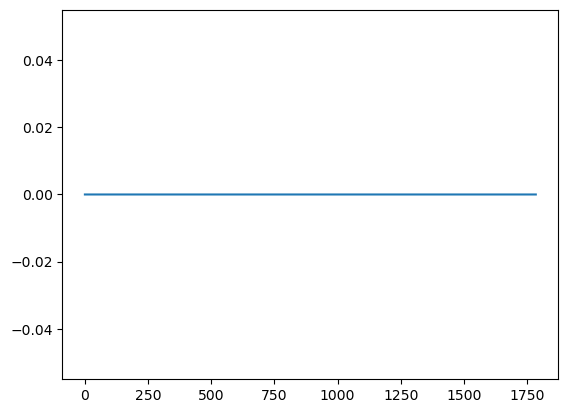

In [9]:
plt.plot(mat1['xn']-mat2['xn'])

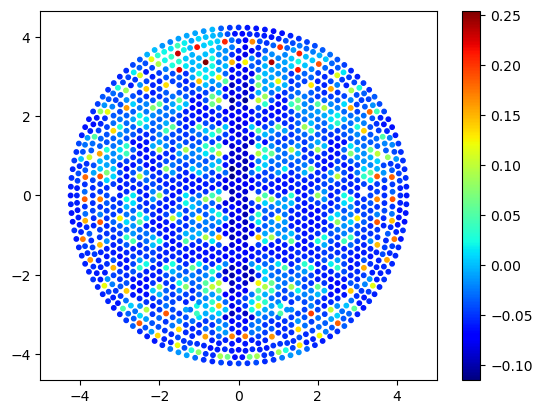

In [17]:
plt.scatter(mat1['xn'], mat2['yn'], 10, mat2['dtmt'])
plt.axis('equal')
plt.colorbar()

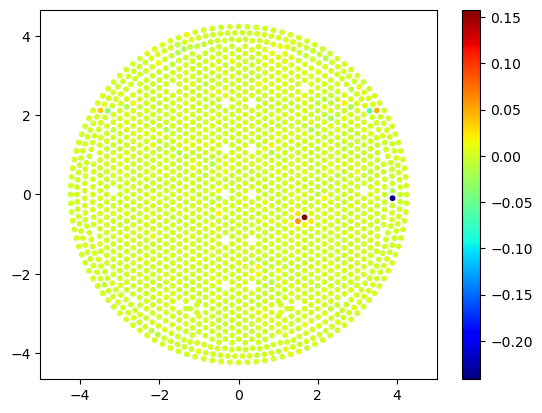

In [15]:
plt.scatter(mat1['xn'], mat2['yn'], 10, mat1['dtmt']-mat2['dtmt'])
plt.axis('equal')
plt.colorbar()

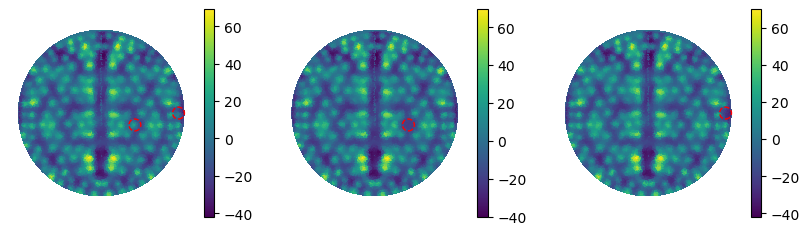

In [24]:
fig, ax = plt.subplots(1,3, figsize=(10,2.7))

data = np.load("../Data/m1testcell/print-through/outer.pkl",allow_pickle=True)
nodex = np.asarray(data["nodes"]).reshape(-1,2)[:,0]
nodey = np.asarray(data["nodes"]).reshape(-1,2)[:,1]
s = np.asarray(data["field"])

img = ax[0].tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
fig.colorbar(img, ax=ax[0]) #, label="Surface error [nm]")
#ax[0].title('Surface RMS = %.1f nm'%(np.std(s)*1e9))
ax[0].axis('equal');
ax[0].axis('off');

x1=1.7
y1=-0.6
x2=3.9
y2=0
cs =0.3
circle = plt.Circle((x1,y1),cs, color='r',linestyle='--', fill=False)
ax[0].add_artist(circle)
circle = plt.Circle((x2,y2),cs, color='r',linestyle='--', fill=False)
ax[0].add_artist(circle)

data = np.load("../Data/m1testcell/cold-spot_triple/outer.pkl",allow_pickle=True)
nodex = np.asarray(data["nodes"]).reshape(-1,2)[:,0]
nodey = np.asarray(data["nodes"]).reshape(-1,2)[:,1]
s = np.asarray(data["field"])

img = ax[1].tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
fig.colorbar(img, ax=ax[1]) #, label="Surface error [nm]")
#ax[0].title('Surface RMS = %.1f nm'%(np.std(s)*1e9))
ax[1].axis('equal');
ax[1].axis('off');

circle = plt.Circle((x1,y1),cs,color='r',linestyle='--', fill=False)
ax[1].add_artist(circle)

data = np.load("../Data/m1testcell/cold-spot_single/outer.pkl",allow_pickle=True)
nodex = np.asarray(data["nodes"]).reshape(-1,2)[:,0]
nodey = np.asarray(data["nodes"]).reshape(-1,2)[:,1]
s = np.asarray(data["field"])

img = ax[2].tripcolor(*np.asarray(data["nodes"]).reshape(-1,2).T,np.asarray(data["field"])*1e9)
fig.colorbar(img, ax=ax[2]) #, label="Surface error [nm]")
#ax[0].title('Surface RMS = %.1f nm'%(np.std(s)*1e9))
ax[2].axis('equal');
ax[2].axis('off');

circle = plt.Circle((x2,y2),cs, color='r',linestyle='--',fill=False)
ax[2].add_artist(circle)